#### Architecture - Semantic Search using Elastic Search


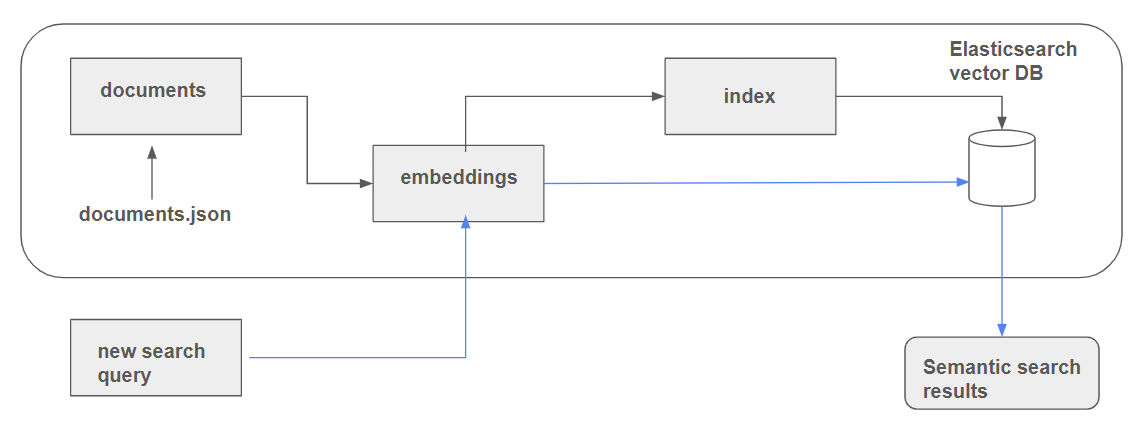

* Two very important concepts in Elasticsearch are documents and indexes.

* A document is collection of fields with their associated values. 

* To work with Elasticsearch you have to organize your data into documents, and then add all your documents to an index. 

* Index as a collection of documents that is stored in a highly optimized format designed to perform efficient searches.

#### Step 1: Prepare documents

In [54]:
import json

with open('documents.json', 'rt') as f_in:
    docs_raw = json.load(f_in)

In [55]:
documents = []

for course_dict in docs_raw:
    for doc in course_dict['documents']:
        doc['course'] = course_dict['course']
        documents.append(doc)

documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp'}

#### Step 2: Create Embeddings using Pretrained Models

Sentence Transformers documentation here: https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

In [56]:
# This is a new library compared to the previous modules. 
# Please perform "pip install sentence_transformers==2.7.0"
from sentence_transformers import SentenceTransformer

# if you get an error do the following:
# 1. Uninstall numpy 
# 2. Uninstall torch
# 3. pip install numpy==1.26.4
# 4. pip install torch
# run the above cell, it should work
model = SentenceTransformer("multi-qa-distilbert-cos-v1")

In [57]:
# model.encode("I just discovered the course. Can I still join it?")

In [58]:
with open('documents-with-ids.json', 'rt') as f_in:
    documents = json.load(f_in)

In [59]:
documents[1]

{'text': 'GitHub - DataTalksClub data-engineering-zoomcamp#prerequisites',
 'section': 'General course-related questions',
 'question': 'Course - What are the prerequisites for this course?',
 'course': 'data-engineering-zoomcamp',
 'id': '1f6520ca'}

In [60]:
#created the dense vector using the pre-trained model
embeddings = []
new_documents = []

for doc in documents:
    if doc['course'] == 'machine-learning-zoomcamp':
        new_documents.append(doc)
        qa_text = "{question} {text}".format(question = doc["question"],text = doc["text"])
        # Transforming the title into an embedding using the model
        result_emb = model.encode(qa_text).tolist()
        embeddings.append(result_emb)

In [62]:
len(embeddings)

375

In [63]:
len(new_documents)

375

In [64]:
import numpy as np
X = np.array(embeddings)
X.shape

(375, 768)

In [84]:
v

array([ 7.82226250e-02, -4.01311703e-02,  3.86136174e-02, -1.78987757e-04,
        8.92346427e-02, -5.04591055e-02, -1.05026551e-02,  3.71055901e-02,
       -4.18714359e-02,  3.48085128e-02, -1.20701836e-02, -2.36942433e-02,
        3.87899987e-02,  1.60988122e-02,  3.50747257e-02,  3.04752332e-03,
        5.79672307e-02, -4.10627350e-02, -3.41552682e-02, -2.56395936e-02,
       -3.55264358e-02,  1.42907919e-02, -1.62800103e-02,  3.21446508e-02,
       -4.66897748e-02,  7.89185688e-02,  4.90161106e-02,  1.56760812e-02,
       -1.69110298e-02,  2.26482227e-02,  5.60206398e-02, -3.98361310e-02,
        6.77409768e-02, -1.20210079e-02,  1.12625223e-03, -1.94394998e-02,
       -2.65951511e-02,  1.06178010e-02,  1.69687662e-02,  1.13487877e-02,
       -2.97063515e-02,  5.25258556e-02, -1.41453333e-02,  4.61700037e-02,
        1.17066205e-02, -2.38052793e-02, -6.32557869e-02, -1.92042068e-02,
       -7.10597867e-03,  3.24167944e-02,  2.49617770e-02, -5.27500315e-03,
        2.01149546e-02, -

In [83]:
X[1]

array([ 7.06690699e-02, -1.93056408e-02,  7.73837119e-02,  2.37204805e-02,
        8.63914415e-02, -2.04659216e-02,  9.15529765e-03,  4.65580933e-02,
       -4.78187110e-03, -1.43748010e-02, -1.97508372e-02, -4.51360159e-02,
        3.47971916e-02, -4.37993854e-02,  3.87682654e-02, -2.01996565e-02,
       -1.13338139e-03, -4.24227193e-02,  3.04053202e-02, -3.29325199e-02,
       -8.21834616e-03,  2.65475432e-03,  3.13991271e-02,  4.64935452e-02,
       -4.02436554e-02,  5.76140769e-02, -1.99844446e-02,  2.95837503e-02,
       -8.68472457e-03, -9.97339282e-03,  7.24729896e-03, -5.11227883e-02,
        7.30460882e-02,  2.48600133e-02,  4.75398712e-02, -1.94742233e-02,
       -6.19657971e-02,  6.10636808e-02, -7.48167420e-03,  4.05436344e-02,
       -3.07619125e-02,  1.59536898e-02,  2.08377503e-02,  1.18389977e-02,
       -3.59451734e-02, -1.50298057e-02,  4.09365855e-02, -4.85864561e-03,
       -3.44601013e-02,  3.27185616e-02, -1.14694852e-02,  4.67684679e-02,
        8.60479623e-02,  

In [65]:
v = model.encode("I just discovered the course. Can I still join it?")

In [66]:
v.shape

(768,)

In [67]:
scores = X.dot(v)

In [68]:
max_value = np.max(scores)

In [69]:
max_value

0.6506575678841422

In [70]:
new_documents

[{'text': 'Machine Learning Zoomcamp FAQ\nThe purpose of this document is to capture frequently asked technical questions.\nWe did this for our data engineering course and it worked quite well. Check this document for inspiration on how to structure your questions and answers:\nData Engineering Zoomcamp FAQ\nIn the course GitHub repository there’s a link. Here it is: https://airtable.com/shryxwLd0COOEaqXo\nwork',
  'section': 'General course-related questions',
  'question': 'How do I sign up?',
  'course': 'machine-learning-zoomcamp',
  'id': '0227b872'},
 {'text': 'The course videos are pre-recorded, you can start watching the course right now.\nWe will also occasionally have office hours - live sessions where we will answer your questions. The office hours sessions are recorded too.\nYou can see the office hours as well as the pre-recorded course videos in the course playlist on YouTube.',
  'section': 'General course-related questions',
  'question': 'Is it going to be live? When?'

In [71]:
class VectorSearchEngine():
    def __init__(self, documents, embeddings):
        self.documents = documents
        self.embeddings = embeddings

    def search(self, v_query, num_results=5):
        scores = self.embeddings.dot(v_query)
        idx = np.argsort(-scores)[:num_results]
        return [self.documents[i] for i in idx]

search_engine = VectorSearchEngine(documents=new_documents, embeddings=X)
search_engine.search(v, num_results=5)

[{'text': 'Yes, you can. You won’t be able to submit some of the homeworks, but you can still take part in the course.\nIn order to get a certificate, you need to submit 2 out of 3 course projects and review 3 peers’ Projects by the deadline. It means that if you join the course at the end of November and manage to work on two projects, you will still be eligible for a certificate.',
  'section': 'General course-related questions',
  'question': 'The course has already started. Can I still join it?',
  'course': 'machine-learning-zoomcamp',
  'id': 'ee58a693'},
 {'text': 'Welcome to the course! Go to the course page (http://mlzoomcamp.com/), scroll down and start going through the course materials. Then read everything in the cohort folder for your cohort’s year.\nClick on the links and start watching the videos. Also watch office hours from previous cohorts. Go to DTC youtube channel and click on Playlists and search for {course yyyy}. ML Zoomcamp was first launched in 2021.\nOr you c

In [72]:
import pandas as pd

df_ground_truth = pd.read_csv("ground-truth-data.csv")
df_ground_truth = df_ground_truth[df_ground_truth.course == 'machine-learning-zoomcamp']
ground_truth = df_ground_truth.to_dict(orient='records')

In [73]:
ground_truth

[{'question': 'Where can I sign up for the course?',
  'course': 'machine-learning-zoomcamp',
  'document': '0227b872'},
 {'question': 'Can you provide a link to sign up?',
  'course': 'machine-learning-zoomcamp',
  'document': '0227b872'},
 {'question': 'Is there an FAQ for this Machine Learning course?',
  'course': 'machine-learning-zoomcamp',
  'document': '0227b872'},
 {'question': 'Does this course have a GitHub repository for the sign-up link?',
  'course': 'machine-learning-zoomcamp',
  'document': '0227b872'},
 {'question': 'How can I structure my questions and answers for the course?',
  'course': 'machine-learning-zoomcamp',
  'document': '0227b872'},
 {'question': 'Are the course videos live or pre-recorded?',
  'course': 'machine-learning-zoomcamp',
  'document': '39fda9f0'},
 {'question': 'When can I start watching the course videos?',
  'course': 'machine-learning-zoomcamp',
  'document': '39fda9f0'},
 {'question': 'Are the live office hours sessions recorded?',
  'cours

In [74]:
# results = search_engine.search(query, num_results=5)

In [75]:
# results

In [76]:
from tqdm.auto import tqdm

relevance_total = []

for q in tqdm(ground_truth):
    doc_id = q['document']
    query = model.encode(q['question'])
    results = search_engine.search(query, num_results=5)
    relevance = [d['id'] == doc_id for d in results]
    relevance_total.append(relevance)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [77]:
# relevance_total

[[False, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [False, False, False, False, False],
 [False, False, False, True, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [False, False, True, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],
 [True, False, False, False, False],

In [78]:
def hit_rate(relevance_total):
    cnt = 0

    for line in relevance_total:
        if True in line:
            cnt = cnt + 1

    return cnt / len(relevance_total)

In [79]:
hit_rate(relevance_total)

0.9398907103825137

In [5]:
# documents[1]

#### Step 3: Setup ElasticSearch connection 

In [80]:
from elasticsearch import Elasticsearch
es_client = Elasticsearch('http://localhost:9200') 

es_client.info()

ObjectApiResponse({'name': 'd1185e259b61', 'cluster_name': 'docker-cluster', 'cluster_uuid': 'nQKdUJkbR7mXbnYFLNmCKQ', 'version': {'number': '8.4.3', 'build_flavor': 'default', 'build_type': 'docker', 'build_hash': '42f05b9372a9a4a470db3b52817899b99a76ee73', 'build_date': '2022-10-04T07:17:24.662462378Z', 'build_snapshot': False, 'lucene_version': '9.3.0', 'minimum_wire_compatibility_version': '7.17.0', 'minimum_index_compatibility_version': '7.0.0'}, 'tagline': 'You Know, for Search'})

In [93]:
new_documents

[{'text': 'Machine Learning Zoomcamp FAQ\nThe purpose of this document is to capture frequently asked technical questions.\nWe did this for our data engineering course and it worked quite well. Check this document for inspiration on how to structure your questions and answers:\nData Engineering Zoomcamp FAQ\nIn the course GitHub repository there’s a link. Here it is: https://airtable.com/shryxwLd0COOEaqXo\nwork',
  'section': 'General course-related questions',
  'question': 'How do I sign up?',
  'course': 'machine-learning-zoomcamp',
  'id': '0227b872',
  'text_vector': array([ 8.80590826e-02,  1.55936796e-02,  7.92557672e-02,  2.52757873e-02,
          7.55764246e-02, -3.90596911e-02, -4.13813367e-02,  2.52917036e-02,
          2.43241619e-02,  3.62591259e-03, -7.28291273e-03, -3.28750536e-02,
          6.12956136e-02, -5.71100786e-02,  1.16774403e-02, -1.79441236e-02,
          4.49205600e-02, -5.41606396e-02, -1.92259054e-03,  1.48328543e-02,
          7.91353080e-03, -3.43126766e

#### Step 4: Create Mappings and Index

* Mapping is the process of defining how a document, and the fields it contains, are stored and indexed.

* Each document is a collection of fields, which each have their own data type.

* We can compare mapping to a database schema in how it describes the fields and properties that documents hold, the datatype of each field (e.g., string, integer, or date), and how those fields should be indexed and stored 



In [94]:
index_settings = {
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "text": {"type": "text"},
            "section": {"type": "text"},
            "question": {"type": "text"},
            "course": {"type": "keyword"} ,
            "id": {"type": "text"},
            "text_vector": {"type": "dense_vector", "dims": 768, "index": True, "similarity": "cosine"},
        }
    }
}

In [95]:
index_name = "course-questions-ml"

es_client.indices.delete(index=index_name, ignore_unavailable=True)
es_client.indices.create(index=index_name, body=index_settings)

ObjectApiResponse({'acknowledged': True, 'shards_acknowledged': True, 'index': 'course-questions-ml'})

In [96]:
operations = []
for idx, doc in enumerate(new_documents):
    # Transforming the title into an embedding using the model
    doc["text_vector"] = X[idx]
    operations.append(doc)

#### Step 5: Add documents into index

In [97]:
for doc in operations:
    try:
        es_client.index(index=index_name, document=doc)
    except Exception as e:
        print(e)

#### Step 6: Create end user query

In [98]:
search_term = "I just discovered the course. Can I still join it?"
vector_search_term = model.encode(search_term)

In [99]:
len(vector_search_term)

768

In [100]:
query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000, 
}

In [102]:
res = es_client.search(index=index_name, knn=query, source=["text", "section", "question", "course", "id"])
res["hits"]["hits"]

[{'_index': 'course-questions-ml',
  '_id': 'Ny-GnZABtKI2pvYUPHjr',
  '_score': 0.82532895,
  '_source': {'question': 'The course has already started. Can I still join it?',
   'course': 'machine-learning-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Yes, you can. You won’t be able to submit some of the homeworks, but you can still take part in the course.\nIn order to get a certificate, you need to submit 2 out of 3 course projects and review 3 peers’ Projects by the deadline. It means that if you join the course at the end of November and manage to work on two projects, you will still be eligible for a certificate.',
   'id': 'ee58a693'}},
 {'_index': 'course-questions-ml',
  '_id': 'Oi-GnZABtKI2pvYUPXgb',
  '_score': 0.73585373,
  '_source': {'question': 'I just joined. What should I do next? How can I access course materials?',
   'course': 'machine-learning-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Welcome to the course! Go

In [103]:
def elastic_search(query, course):
    search_query = {
        "size": 5,
        "query": {
            "bool": {
                "must": {
                    "multi_match": {
                        "query": query,
                        "fields": ["question^3", "text", "section"],
                        "type": "best_fields"
                    }
                },
                "filter": {
                    "term": {
                        "course": course
                    }
                }
            }
        }
    }

    response = es_client.search(index=index_name, body=search_query)
    
    result_docs = []
    
    for hit in response['hits']['hits']:
        result_docs.append(hit['_source'])
    
    return result_docs

In [104]:
elastic_search(
    query="I just discovered the course. Can I still join?",
    course="machine-learning-zoomcamp"
)

[{'text': 'Yes, you can. You won’t be able to submit some of the homeworks, but you can still take part in the course.\nIn order to get a certificate, you need to submit 2 out of 3 course projects and review 3 peers’ Projects by the deadline. It means that if you join the course at the end of November and manage to work on two projects, you will still be eligible for a certificate.',
  'section': 'General course-related questions',
  'question': 'The course has already started. Can I still join it?',
  'course': 'machine-learning-zoomcamp',
  'id': 'ee58a693',
  'text_vector': [0.08062857389450073,
   -0.06663887947797775,
   0.025273095816373825,
   -0.013004409149289131,
   0.07587287575006485,
   -0.05946265161037445,
   -0.021883858367800713,
   0.0029000400099903345,
   0.0007928907871246338,
   -0.005222374107688665,
   -0.03365179896354675,
   -0.027913564816117287,
   0.05811655893921852,
   0.03974829614162445,
   0.05441856011748314,
   -0.0382516048848629,
   0.0630574300885

In [105]:
relevance_total = []

for q in tqdm(ground_truth):
    doc_id = q['document']
    results = elastic_search(query=q['question'], course=q['course'])
    relevance = [d['id'] == doc_id for d in results]
    relevance_total.append(relevance)

  0%|          | 0/1830 [00:00<?, ?it/s]

In [106]:
hit_rate(relevance_total)

0.7530054644808744

#### Step 7: Perform Keyword search with Semantic Search (Hybrid/Advanced Search)

In [18]:
# Note: I made a minor modification to the query shown in the notebook here
# (compare to the one shown in the video)
# Included "knn" in the search query (to perform a semantic search) along with the filter  
knn_query = {
    "field": "text_vector",
    "query_vector": vector_search_term,
    "k": 5,
    "num_candidates": 10000
}

In [23]:
response = es_client.search(
    index=index_name,
    query={
        "match": {"section": "General course-related questions"},
    },
    knn=knn_query,
    source=["text", "section", "question", "course"],
    size=5
)

In [24]:
response["hits"]["hits"]

[{'_index': 'course-questions',
  '_id': '2GgXh5ABYIumgQO3vkrm',
  '_score': 11.614713,
  '_source': {'question': 'Environment - Is the course [Windows/mac/Linux/...] friendly?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'Yes! Linux is ideal but technically it should not matter. Students last year used all 3 OSes successfully'}},
 {'_index': 'course-questions',
  '_id': 'yWgXh5ABYIumgQO3vkpH',
  '_score': 11.4985075,
  '_source': {'question': 'Environment - Should I use my local machine, GCP, or GitHub Codespaces for my environment?',
   'course': 'data-engineering-zoomcamp',
   'section': 'General course-related questions',
   'text': 'You can set it up on your laptop or PC if you prefer to work locally from your laptop or PC.\nYou might face some challenges, especially for Windows users. If you face cnd2\nIf you prefer to work on the local machine, you may start with the week 1 Introduction to Docker and follow through.\nHo

#### References

1. https://logz.io/blog/elasticsearch-mapping/#:~:text=Within%20a%20search%20engine%2C%20mapping,indexes%20and%20stores%20its%20fields

2. https://www.sbert.net/docs/sentence_transformer/pretrained_models.html

3. https://www.elastic.co/search-labs/tutorials

4. https://www.elastic.co/search-labs/blog/text-similarity-search-with-vectors-in-elasticsearch